# The PTO Model

#### Author(s):  Christopher J. Banks, Daniel D. Seaton, Ian Stark
#### Reference: [Banks, Seaton and Stark (2015)](https://link.springer.com/chapter/10.1007/978-3-319-23401-4_19) | [Download](https://cpi-catalog.000webhostapp.com/cpi-files/pto.cpi)

This is a model of a post-translational oscillator (PTO). PTOs generate sustained oscillations in the absence of transcription and translation. Such oscillators are of particular interest in the circadian clock field.

PTOs have recently been postulated to generate endogenous 24-hour rhythms in diverse organisms [15]. Here, we investigate a minimal model of a PTO due to Jolley et al. [10]. This model has a simple structure - it consists only of a kinase, a phosphatase, and a substrate—but can exhibit robust oscillatory behaviour similar to that observed in circadian clocks.

## The Jolley PTO Model

Jolley, Ode, and Ueda present their model as a set of coupled ODEs. In theirpaper [10], sets of parameters are identified which give distinct patterns of oscillation in the system. The model aims to provide a framework for analysing and synthesising PTOs and they provide evidence that it is a viable candidate for a minimal circadian clock. However, to date, little further analysis of the properties of the complex behaviour of this oscillator has been done.

## The CPi Model Construction

We first define each species andits binding sites and actions. We then define how different species can interact with each other. Then we define the initial conditions of our mixture, which species are present and in what concentrations. The model can then be executed to determine the behaviour, using numerical simulation.

### Species

The species in our model are the kinase E, the phosphatase F, and the substrate molecule which has four phosphorylation states S00, S01, S10, and S11. The simplest of these are the two enzymes E and F. The kinase E has a site e and the phosphatase F has a site f. Each can interact on its site with another molecule, perform some other function which depends on the molecule it is bound to, then return to its original state - from which it can perform the same action again. This directly corresponds to the definition of an enzyme. In our cπ model we represent each of the four states of the substrate as a distinct species. This is simply to break down the syntactic description into smaller parts. In this model a change of state is essentially a change of species, but to the observer these species can be considered as one.

Each of the states is defined, each containing a definition of the behaviour at each of the two phosphorylation sites. Each of these definitions is similar in structure, reflecting that they in fact represent distinct states of the same molecule.

## Further Details

Full details of definitions, the affinity networks, and their rates can be found in Appendix A of the original publication under the reference.


In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import CPi

In [6]:
cpi_model = CPi.ReadCPiFile('pto')

Select the model: pto
The processes in this cpi model are:
PTO


## Code

In [8]:
ode_def = cpi_model.view_processdef('PTO')

The cpi definitions of selected file are:

-----------------

-- Jolley's PTO

-----------------



species S00(s00a,s00b,s01e,s01f,s10e,s10f,s11a,s11b)

		= {u-xe@10.02, ca-xe@163.31, cb-xe@0}

		  s00a<xe>.(u.S00(s00a,s00b,s01e,s01f,s10e,s10f,s11a,s11b)

		  		   +

				   ca.S01(s00a,s00b,s01e,s01f,s10e,s10f,s11a,s11b))

		  +

		  s00b<xe>.(u.S00(s00a,s00b,s01e,s01f,s10e,s10f,s11a,s11b)

		  		   +

				   cb.S10(s00a,s00b,s01e,s01f,s10e,s10f,s11a,s11b));



species S01(s00a,s00b,s01e,s01f,s10e,s10f,s11a,s11b)

		= {xe-u@10.02, xe-c@40.83, xf-u@10.02, xf-c@8.17}

		  s01e<xe>.(u.S01(s00a,s00b,s01e,s01f,s10e,s10f,s11a,s11b)

				   +

				   c.S11(s00a,s00b,s01e,s01f,s10e,s10f,s11a,s11b))

		  +

		  s01f<xf>.(u.S01(s00a,s00b,s01e,s01f,s10e,s10f,s11a,s11b)

				   +

				   c.S00(s00a,s00b,s01e,s01f,s10e,s10f,s11a,s11b));



species S10(s00a,s00b,s01e,s01f,s10e,s10f,s11a,s11b)

		= {xe-u@10.02, xe-c@8.17, xf-u@10.02, xf-c@40.83}

		  s10e<xe>.(u.S10(s00a,s00b,s01e,s01f,s10e,s10f,s11

## Plot

Time Start: 0.0, Time End: 100.0, Number of Times: 1000.


<IPython.core.display.Javascript object>


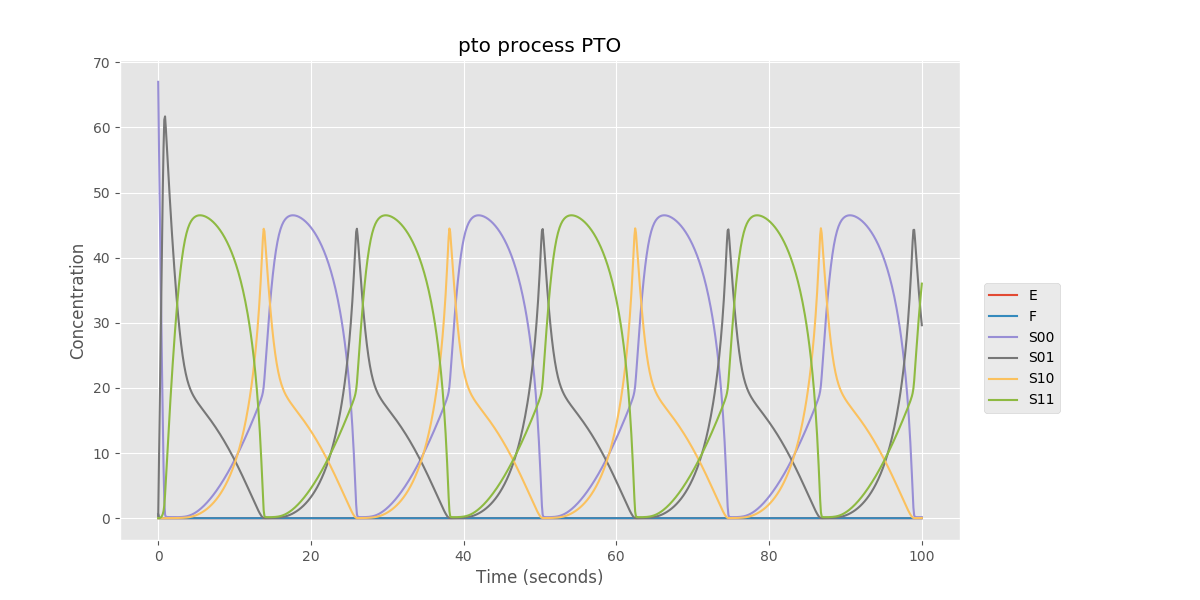

Picture will not be saved or you can change your selection.


In [9]:
solution = cpi_model.simulate_process('PTO','odeint', 0, 100, 1000)
solution.show_plot()